In [1]:
!pip install yfinance

     ---------------------------------------- 62.5/62.5 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 30.1 MB/s eta 0:00:00
     -------------------------------------- 143.0/143.0 kB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 41.8 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.8 MB/s eta 0:00:00
     ------------------------------------- 179.1/179.1 kB 10.6 MB/s eta 0:00:00
     -------------------------------------- 118.7/118.7 kB 6.8 MB/s eta 0:00:00


In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# S&P500 data pull

In [24]:
# Get the data for the stock AAPL
Sp_data = yf.download('SPY','2011-01-01','2023-06-10')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [25]:
Sp_data.reset_index(inplace=True)
Sp_data['Date'] = pd.to_datetime(Sp_data['Date'])
Sp_data.columns = ['Date','S&P500']

C:\Users\vamsh\AppData\Local\Temp\ipykernel_27452\2792102629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sp_data['Date'] = pd.to_datetime(Sp_data['Date'])


In [26]:
Sp_data.head()

,Date,S&P500
0,2011-01-03,127.050003
1,2011-01-04,126.980003
2,2011-01-05,127.639999
3,2011-01-06,127.389999
4,2011-01-07,127.139999


## Fear Index data

In [27]:
Fear_data = pd.read_csv(r'C:\Users\vamsh\OneDrive\Desktop\Trading_Bot_version_1\Data\complete_data_fearindex.csv',index_col=0)
Fear_data.columns = ['Date','Fear_index']
Fear_data['Date'] = pd.to_datetime(Fear_data['Date'])

In [28]:
Fear_data.head()

,Date,Fear_index
0,2011-01-03,68.0
1,2011-01-04,68.0
2,2011-01-05,67.0
3,2011-01-06,64.0
4,2011-01-07,63.0


In [80]:
Complete_df = pd.merge(Fear_data, Sp_data, on='Date', how='left')
Complete_df.dropna(inplace=True)

In [81]:
Complete_df.head()

,Date,Fear_index,S&P500
0,2011-01-03,68.0,127.050003
1,2011-01-04,68.0,126.980003
2,2011-01-05,67.0,127.639999
3,2011-01-06,64.0,127.389999
4,2011-01-07,63.0,127.139999


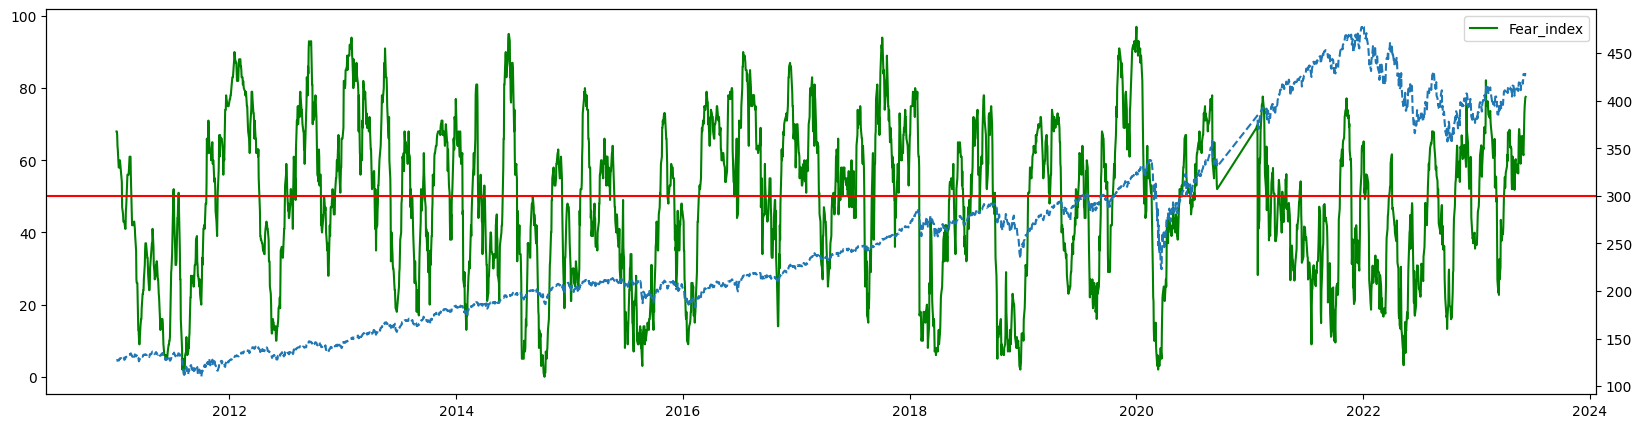

In [82]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(Complete_df['Date'], Complete_df['Fear_index'],'-', label = 'Fear_index',color='green')
plt.axhline(y=300, color='r', linestyle='-')
ax2.plot(Complete_df['Date'], Complete_df['S&P500'], '--', label = 'S&P 500')

ax.legend(loc=0)

plt.show()

In [83]:
def fear_category(x):
    if x <= 25:
        return "Extreme fear"
    elif (x <= 50) and (x > 25):
        return "Fear"
    elif (x <= 75) and (x > 50):
        return "Greed"
    elif (x <= 100) and (x > 75):
        return "Extreme Greed"

In [84]:
Complete_df['Fear_category'] = Complete_df['Fear_index'].apply(lambda x: fear_category(x))

In [85]:
Complete_df[['Fear_index','S&P500']].corr()

,Fear_index,S&P500
Fear_index,1.000000,-0.029233
S&P500,-0.029233,1.000000


In [89]:
Complete_df['Price_diff'] = Complete_df['S&P500'].diff()

In [93]:
Complete_df.drop(index=0,inplace=True)

In [100]:
Complete_df['Market_Direction'] = (Complete_df['Price_diff']>0).astype(int)

In [106]:
Complete_df[Complete_df['Fear_category'].isin(['Fear', 'Extreme fear'])]

,Date,Fear_index,S&P500,Fear_category,Price_diff,Market_Direction
13,2011-01-21,47.000000,128.369995,Fear,0.289993,1
14,2011-01-24,45.000000,129.100006,Fear,0.730011,1
15,2011-01-25,43.000000,129.169998,Fear,0.069992,1
16,2011-01-26,43.000000,129.669998,Fear,0.500000,1
17,2011-01-27,43.000000,129.990005,Fear,0.320007,1
...,...,...,...,...,...,...
3239,2023-03-27,40.200000,396.489990,Fear,0.739990,1
3240,2023-03-28,39.600000,395.600006,Fear,-0.889984,0
3241,2023-03-29,41.457143,401.350006,Fear,5.750000,1
3242,2023-03-30,45.228571,403.700012,Fear,2.350006,1


In [110]:
Complete_df ['Year'] = Complete_df['Date'].dt.year
Complete_df ['Month'] = Complete_df['Date'].dt.month

In [111]:
Complete_df

,Date,Fear_index,S&P500,Fear_category,Price_diff,Market_Direction,Year,Month
1,2011-01-04,68.000000,126.980003,Greed,-0.070000,0,2011,1
2,2011-01-05,67.000000,127.639999,Greed,0.659996,1,2011,1
3,2011-01-06,64.000000,127.389999,Greed,-0.250000,0,2011,1
4,2011-01-07,63.000000,127.139999,Greed,-0.250000,0,2011,1
5,2011-01-10,58.000000,126.980003,Greed,-0.159996,0,2011,1
...,...,...,...,...,...,...,...,...
3309,2023-06-05,73.114286,427.100006,Greed,-0.820007,0,2023,6
3310,2023-06-06,75.057143,428.029999,Extreme Greed,0.929993,1,2023,6
3311,2023-06-07,76.228571,426.549988,Extreme Greed,-1.480011,0,2023,6
3312,2023-06-08,77.400000,429.130005,Extreme Greed,2.580017,1,2023,6


In [122]:
Complete_df[['Fear_category','Year',]].groupby(['Year','Fear_category']).size()

Year  Fear_category
2011  Extreme Greed      2
      Extreme fear      75
      Fear             105
      Greed             69
2012  Extreme Greed     61
      Extreme fear      23
      Fear              73
      Greed             93
2013  Extreme Greed     53
      Extreme fear      18
      Fear              66
      Greed            115
2014  Extreme Greed     26
      Extreme fear      56
      Fear             110
      Greed             60
2015  Extreme Greed      7
      Extreme fear      66
      Fear             103
      Greed             76
2016  Extreme Greed     50
      Extreme fear      25
      Fear              53
      Greed            124
2017  Extreme Greed     30
      Extreme fear       8
      Fear              70
      Greed            143
2018  Extreme Greed     11
      Extreme fear     101
      Fear              53
      Greed             86
2019  Extreme Greed     26
      Extreme fear      27
      Fear              72
      Greed            127
2020  Ex

In [124]:
Complete_df[['Fear_category','Month']].groupby(['Fear_category','Month']).size()

Fear_category  Month
Extreme Greed  1         60
               2         53
               3         22
               5         15
               6         29
               7         18
               8         19
               9         23
               10        18
               11        16
               12        25
Extreme fear   1         31
               2         37
               3         65
               4         26
               5         46
               6         46
               7         28
               8         84
               9         52
               10        59
               11        25
               12        26
Fear           1         55
               2         53
               3         90
               4        132
               5        120
               6        117
               7        103
               8         62
               9         91
               10        91
               11        43
               12        63

In [125]:
Complete_df

,Date,Fear_index,S&P500,Fear_category,Price_diff,Market_Direction,Year,Month
1,2011-01-04,68.000000,126.980003,Greed,-0.070000,0,2011,1
2,2011-01-05,67.000000,127.639999,Greed,0.659996,1,2011,1
3,2011-01-06,64.000000,127.389999,Greed,-0.250000,0,2011,1
4,2011-01-07,63.000000,127.139999,Greed,-0.250000,0,2011,1
5,2011-01-10,58.000000,126.980003,Greed,-0.159996,0,2011,1
...,...,...,...,...,...,...,...,...
3309,2023-06-05,73.114286,427.100006,Greed,-0.820007,0,2023,6
3310,2023-06-06,75.057143,428.029999,Extreme Greed,0.929993,1,2023,6
3311,2023-06-07,76.228571,426.549988,Extreme Greed,-1.480011,0,2023,6
3312,2023-06-08,77.400000,429.130005,Extreme Greed,2.580017,1,2023,6


In [140]:
Complete_df["cumsum"] =(Complete_df['Fear_category'] != Complete_df['Fear_category'].shift()).cumsum()

In [141]:
Complete_df

,Date,Fear_index,S&P500,Fear_category,Price_diff,Market_Direction,Year,Month,cumsum
1,2011-01-04,68.000000,126.980003,Greed,-0.070000,0,2011,1,1
2,2011-01-05,67.000000,127.639999,Greed,0.659996,1,2011,1,1
3,2011-01-06,64.000000,127.389999,Greed,-0.250000,0,2011,1,1
4,2011-01-07,63.000000,127.139999,Greed,-0.250000,0,2011,1,1
5,2011-01-10,58.000000,126.980003,Greed,-0.159996,0,2011,1,1
...,...,...,...,...,...,...,...,...,...
3309,2023-06-05,73.114286,427.100006,Greed,-0.820007,0,2023,6,386
3310,2023-06-06,75.057143,428.029999,Extreme Greed,0.929993,1,2023,6,387
3311,2023-06-07,76.228571,426.549988,Extreme Greed,-1.480011,0,2023,6,387
3312,2023-06-08,77.400000,429.130005,Extreme Greed,2.580017,1,2023,6,387


In [149]:
Complete_df['Fear_category'].unique()

array(['Greed', 'Fear', 'Extreme fear', 'Extreme Greed'], dtype=object)

## EXTREME FEARS START AND END DATES

In [160]:
Complete_df[Complete_df['Fear_category'] == 'Extreme fear'][['Date','cumsum','S&P500']].groupby('cumsum').agg({"Date": ["min", "max"], "S&P500": ["min", "max"]})

Date                 S&P500            
              min        max         min         max
cumsum                                              
5      2011-03-14 2011-03-31  126.180000  132.770004
7      2011-04-18 2011-04-20  130.559998  133.100006
9      2011-05-18 2011-06-27  126.809998  134.899994
15     2011-07-29 2011-08-30  112.260002  129.330002
17     2011-09-08 2011-09-09  115.919998  119.040001
...           ...        ...         ...         ...
364    2022-06-30 2022-07-06  377.250000  383.250000
370    2022-09-22 2022-10-03  357.179993  374.220001
372    2022-10-06 2022-10-17  356.559998  373.200012
382    2023-03-13 2023-03-13  385.359985  385.359985
384    2023-03-15 2023-03-15  389.279999  389.279999

[65 rows x 4 columns]

In [157]:
Complete_df[Complete_df['Fear_category'] == 'Fear'][['Date','cumsum','S&P500']].groupby('cumsum').agg({"Date": ["min", "max"], "S&P500": ["min", "max"]}).reset_index()

cumsum       Date                 S&P500            
                  min        max         min         max
0        2 2011-01-21 2011-02-04  127.720001  131.149994
1        4 2011-02-22 2011-03-11  129.940002  133.470001
2        6 2011-04-01 2011-04-15  131.460007  133.660004
3        8 2011-04-21 2011-05-17  133.169998  136.429993
4       10 2011-06-28 2011-07-01  129.610001  133.919998
..     ...        ...        ...         ...         ...
147    373 2022-10-18 2022-10-24  365.410004  378.869995
148    377 2022-12-16 2023-01-10  376.660004  390.579987
149    381 2023-03-07 2023-03-10  385.910004  398.920013
150    383 2023-03-14 2023-03-14  391.730011  391.730011
151    385 2023-03-16 2023-03-31  389.989990  409.390015

[152 rows x 5 columns]

## Avg return calculation of Fear and extreme fear

In [218]:
def Fear_stock_price(df, fear_category):

    Fear_stock_price = df[df['Fear_category'].isin(fear_category)][['Date','cumsum','S&P500']].groupby('cumsum').agg({"Date": ["min", "max"], "S&P500": ["min", "max"]}).reset_index()
    Fear_stock_price.columns = Fear_stock_price.columns.map("_".join)
    Fear_stock_price['No_of_days']  = Fear_stock_price['Date_max'] - Fear_stock_price['Date_min']
    Fear_stock_price['S&P500_price'] = Fear_stock_price['S&P500_max'] - Fear_stock_price['S&P500_min']
    Fear_stock_price['Year'] = Fear_stock_price['Date_min'].dt.year
    Fear_stock_price.drop(Fear_stock_price[Fear_stock_price['No_of_days'] == '0 days'].index, inplace=True)
    Fear_stock_price.drop(columns=['cumsum_','S&P500_min','S&P500_max'], inplace=True)

    return Fear_stock_price

    


<Axes: >

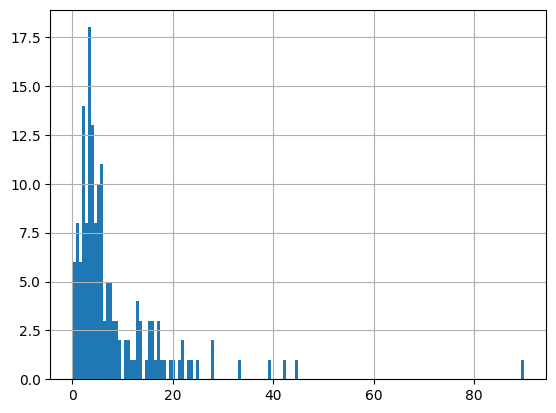

In [198]:
Fear_stock_price(Complete_df, ['Extreme fear','Fear'])['S&P500_price'].hist(bins=150)

In [222]:
Fear_stock_price(Complete_df, ['Extreme fear','Fear'])['No_of_days'].describe()

count                           164
mean     11 days 15:04:23.414634146
std      11 days 01:11:02.518407459
min                 1 days 00:00:00
25%                 4 days 00:00:00
50%                 7 days 00:00:00
75%                16 days 06:00:00
max                60 days 00:00:00
Name: No_of_days, dtype: object

## Total Return in Fear and Xtreme fear markets by year and avg days per year

In [228]:
Fear_stock_price(Complete_df, ['Extreme fear','Fear'])[['Year','S&P500_price','No_of_days']].groupby(['Year']).agg({'S&P500_price':'sum','No_of_days':['mean','min','max']}).reset_index()

Year S&P500_price                 No_of_days               
                  sum                       mean    min     max
0   2011    96.090004 13 days 09:52:56.470588235 1 days 40 days
1   2012    28.449997 18 days 06:51:25.714285714 1 days 36 days
2   2013    44.600006  9 days 02:10:54.545454545 5 days 14 days
3   2014    78.899948 12 days 11:17:38.823529411 2 days 37 days
4   2015   101.309998           13 days 07:30:00 1 days 47 days
5   2016    42.220001            8 days 09:36:00 3 days 20 days
6   2017    28.789978  5 days 16:36:55.384615384 1 days 26 days
7   2018   136.520020 19 days 19:38:10.909090909 1 days 60 days
8   2019    86.330048  7 days 06:51:25.714285714 1 days 18 days
9   2020   144.609970           16 days 08:00:00 3 days 41 days
10  2021   167.549835 10 days 11:22:06.315789473 1 days 41 days
11  2022   376.000000 11 days 02:17:08.571428571 1 days 25 days
12  2023    32.410034            9 days 00:00:00 3 days 15 days